In [1]:
from importlib import reload
import json
import pretty_midi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import modules.midiMethods as midiMethods
reload(midiMethods)
from modules.midiMethods import *

import modules.dataMethods as dataMethods
reload(dataMethods)
from modules.dataMethods import *

import modules.models as models
reload(models)

import modules.mlClasses as mlClasses
reload(mlClasses)

import ast

## Data Exploration
This notebook contains the code needed to make the plots found in the project report, and a few other plots besides. This includes comparisons of training and validation loss for different model configurations. 

In [4]:
# if needed, read in filenames... specify if validation or test
# we'll validation for the purpose of having a smaller sample for some plots 
data_path = 'training_data/MaestroV2.00/maestro-v2.0.0/'
maestro = pd.read_csv('training_data/maestro-v2.0.0withPeriod.csv', index_col=0)
filenames = list(maestro[maestro['split'] == 'validation']['midi_filename'])

In [4]:
# load data
with open('training_data/oore_v1/oore_train.json', 'r') as f:
    X_train = json.load(f)
    
with open('training_data/oore_v1/oore_val.json', 'r') as f:
    X_val = json.load(f)

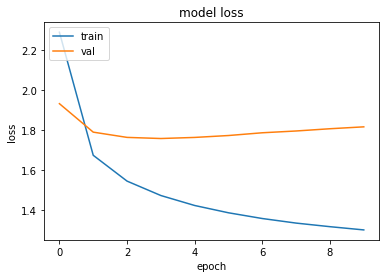

In [2]:
import ast
with open(f'models/oore4/history40e.json', 'r') as f:
    hist = ast.literal_eval(json.load(f))
metric = 'loss'
# print(hist)
plt.plot(hist[metric])
plt.plot(hist['val_' + metric])
plt.title('model ' + metric)
plt.ylabel(metric)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pm = 
metric = 'loss'
# print(hist)
plt.plot(hist['val_dense_1_' + metric])
plt.plot(hist['val_dense_2_' + metric])
plt.plot(hist['val_dense_3_' + metric])
plt.plot(hist['val_dense_4_' + metric])
plt.plot(hist['val_dense_5_' + metric])
plt.plot(hist['val_dense_' + metric])
plt.plot(hist['val_' + metric])
plt.title('model ' + metric)
plt.ylabel(metric)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#### Graphing note lengths and durations
durations = []
lengths = []
for i in range(len(filenames)):
    if i % 10 == 0:
        print(f'file {i} of {len(filenames)}')
    pm = pretty_midi.PrettyMIDI(data_path + filenames[i])
    sustain_only(pm)
    desus(pm)
    last_note_start = 0
    for note in pm.instruments[0].notes:
        lengths.append(note.end - note.start)
    

639425

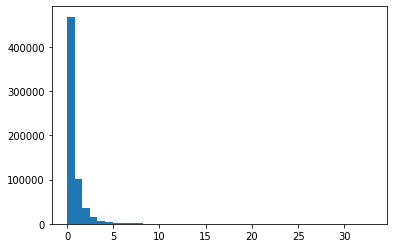

In [17]:
plt.hist(lengths, bins=40)

In [ ]:
plt.hist(durations, bins=40)

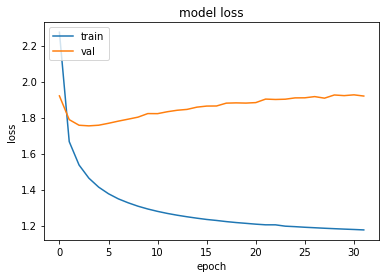

In [3]:
# Comparison of Oore 8 with nb blah
with open(f'models/oore/oore8/history32e.json', 'r') as f:
    hist2 = ast.literal_eval(json.load(f))
metric = 'loss'
models.plt_metric(hist2)
plt.savefig('models/oore/oore8/loss_plot')

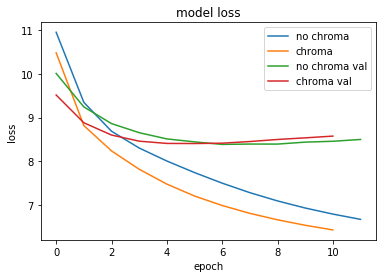

In [2]:
# First experiment showing chroma works. Need better!
import ast
with open(f'models/nbc/nbcmodel3/history40e.json', 'r') as f:
    hist = ast.literal_eval(json.load(f))
with open(f'models/nbc/nbcmodel4/history40e.json', 'r') as f:
    hist2 = ast.literal_eval(json.load(f))
metric = 'loss'
# print(hist)
plt.plot(hist[metric])
plt.plot(hist2[metric])
plt.plot(hist['val_' + metric])
plt.plot(hist2['val_' + metric])
plt.title('model ' + metric)
plt.ylabel(metric)
plt.xlabel('epoch')
plt.legend(['no chroma', 'chroma', 'no chroma val', 'chroma val'], loc='upper right')
plt.savefig('?')
plt.show()

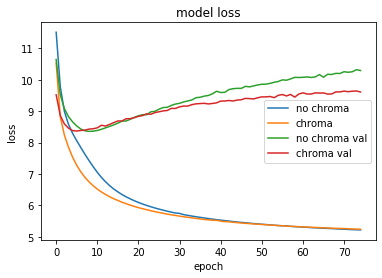

In [17]:
# Comparison of the four different chroma schemes
chroma_type = {5: 'none', 6: 'weighted', 7: 'lowest', 10: 'normal'}
no = 10
with open(f'models/nbc/nbcmodel5/history75e.json', 'r') as f:
    hist = ast.literal_eval(json.load(f))
with open(f'models/nbc/nbcmodel{no}/history75e.json', 'r') as f:
    hist2 = ast.literal_eval(json.load(f))
metric = 'loss'
# print(hist)
plt.plot(hist[metric])
plt.plot(hist2[metric])
plt.plot(hist['val_' + metric])
plt.plot(hist2['val_' + metric])
plt.title('model ' + metric)
plt.ylabel(metric)
plt.xlabel('epoch')
plt.legend(['no chroma', 'chroma', 'no chroma val', 'chroma val'], loc='right')
# plt.savefig('?')
plt.show()

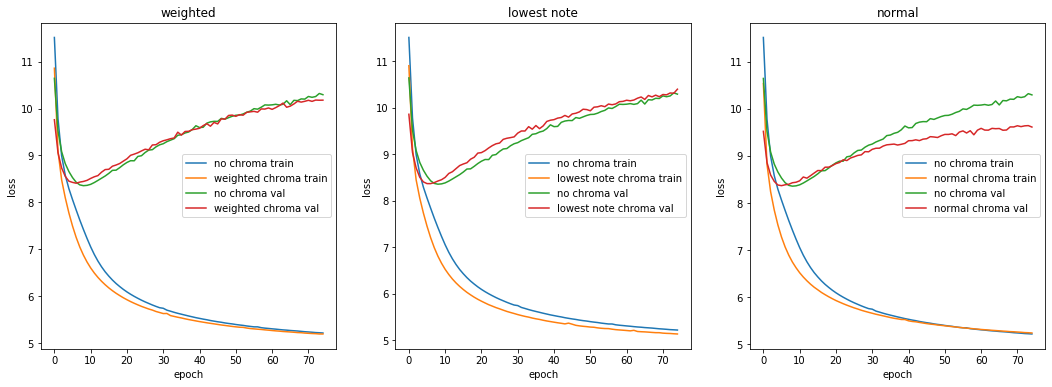

In [35]:
# Comparison of the four different chroma schemes
chroma_type = {6: 'weighted', 7: 'lowest note', 10: 'normal'}
graph_pos = 131
plt.figure(figsize=(18,6))
for no, chroma in chroma_type.items():
    with open(f'models/nbc/nbcmodel5/history75e.json', 'r') as f:
        hist = ast.literal_eval(json.load(f))
    with open(f'models/nbc/nbcmodel{no}/history75e.json', 'r') as f:
        hist2 = ast.literal_eval(json.load(f))
    plt.subplot(graph_pos)
    graph_pos += 1
    metric = 'loss'
    # print(hist)
    plt.plot(hist[metric])
    plt.plot(hist2[metric])
    plt.plot(hist['val_' + metric])
    plt.plot(hist2['val_' + metric])
    plt.title(chroma)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['no chroma train', chroma + ' chroma train', 'no chroma val', chroma + ' chroma val'], loc='right')
plt.savefig('?')
plt.show()

9.335865358027016
10.52765391512615


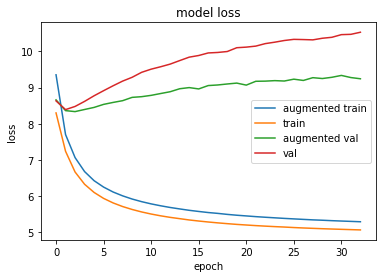

In [5]:
# comparison of nbmodel 21 with 22, showing that augmentation reduces overfitting
with open(f'models/nb/nbmodel21/history33e.json', 'r') as f:
    hist33 = ast.literal_eval(json.load(f))
with open(f'models/nb/nbmodel22/history99e.json', 'r') as f:
    hist99 = ast.literal_eval(json.load(f))

new_hist99 = {}
for key, value in hist99.items():
    new_hist99[key] = [v for i, v in enumerate(value) if i % 3 == 2]

print(max(hist33['val_loss']))
print(max(hist99['val_loss']))
metric = 'loss'
plt.plot(hist33[metric])
plt.plot(new_hist99[metric])
plt.plot(hist33['val_' + metric])
plt.plot(new_hist99['val_' + metric])
plt.title('model ' + metric)
plt.ylabel(metric)
plt.xlabel('epoch')
plt.legend(['augmented train', 'train', 'augmented val', 'val'], loc='right')
# plt.savefig('?')
plt.show()

In [ ]:
# plot loss for each note attribute
metric = 'loss'
# print(hist)
plt.plot(hist['dense_1_' + metric])
plt.plot(hist['dense_2_' + metric])
plt.plot(hist['dense_3_' + metric])
plt.plot(hist['dense_4_' + metric])
plt.plot(hist['dense_5_' + metric])
plt.plot(hist['dense_' + metric])
plt.title('model ' + metric)
plt.ylabel(metric)
plt.xlabel('epoch')
plt.legend([f'dense_{i}' + metric for i in range(1,6)], loc='upper left')
plt.show()